In [1]:
import sys

import numpy as np
import tifffile
import matplotlib.pyplot as plt

sys.path.append('../lccd_python')
import lccd

In [2]:
image = tifffile.imread('data/recording_20161007_143400.tif')

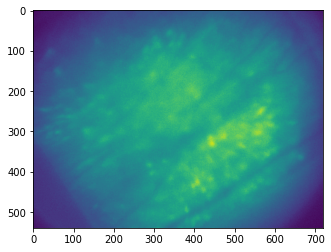

In [3]:
image = np.transpose(image, (1, 2, 0))[::2, ::2, :400]
plt.imshow(image[:, :, 0]) # (W, H, T)

In [4]:
image = (image - np.min(image)) / (np.max(image) - np.min(image)) # image in [0, 1]

In [5]:
import numpy as np
np.save("data/array.npy", image)

In [6]:
config = {
    "blob_detector": {
        "filtersize1": 100,
        "filtersize2": 4,
        "sigma": 1.25,
        "fsize": 7,
        "min_area": 100,
        "max_area": 150,
        "sparse": True
    },
    "roi_integration":{
        "overlap_threshold": 0.4,
        "min_area": 100,
        "max_area": 300,
        "sparse": True
    },
    "lccd": {
        "frame_divider": 100
    }
}

In [7]:
lccd_instance_sparse = lccd.LCCD(config)

In [8]:
%%time
roi = lccd_instance_sparse.apply(image)

CPU times: user 32.7 s, sys: 180 ms, total: 32.9 s
Wall time: 32.9 s


In [9]:
for k in range(100):
    if 381276 == (540-k) * (720- k):
        print(k)

6


In [10]:
roi = roi.reshape(534, 714, -1)

In [11]:
config = {
    "blob_detector": {
        "filtersize1": 100,
        "filtersize2": 4,
        "sigma": 1.25,
        "fsize": 7,
        "min_area": 100,
        "max_area": 150,
        "sparse": False
    },
    "roi_integration":{
        "overlap_threshold": 0.4,
        "min_area": 100,
        "max_area": 300,
        "sparse": False
    },
    "lccd": {
        "frame_divider": 100
    }
}

lccd_instance_dense = lccd.LCCD(config)

In [12]:
%%time
roi_dense = lccd_instance_dense.apply(image)

CPU times: user 37 s, sys: 5.31 s, total: 42.3 s
Wall time: 33.3 s


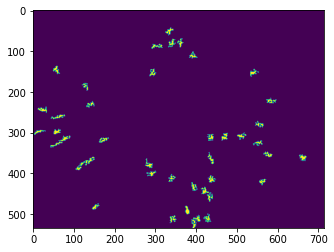

In [13]:
plt.imshow(np.sum(roi_dense.reshape(534, 714, -1), 2))

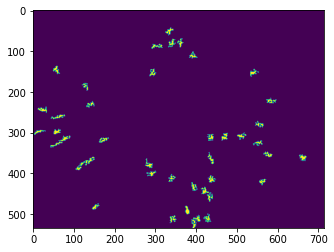

In [14]:
plt.imshow(np.sum(roi.reshape(534, 714, -1), 2))

In [15]:
np.array_equal(np.sum(roi_dense.reshape(534, 714, -1), 2), np.sum(roi.reshape(534, 714, -1), 2))

True